In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
# List the contents of your shared drives
print(os.listdir('/content/drive/MyDrive/DL-ASU_Task_00'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['X_train_tabular.npy', 'y_train_padding.npy', 'X_train_padding.npy', 'y_train_tabular.npy', 'Original_Data.txt']


torch.Size([4361620, 12])
torch.Size([4361620, 14])
Epoch [1/10], Loss: 323.3483
Epoch [2/10], Loss: 283.8355
Epoch [3/10], Loss: 266.9060
Epoch [4/10], Loss: 260.6984
Epoch [5/10], Loss: 256.5975
Epoch [6/10], Loss: 254.3549
Epoch [7/10], Loss: 253.0931
Epoch [8/10], Loss: 252.3903
Epoch [9/10], Loss: 251.7659
Epoch [10/10], Loss: 251.2584


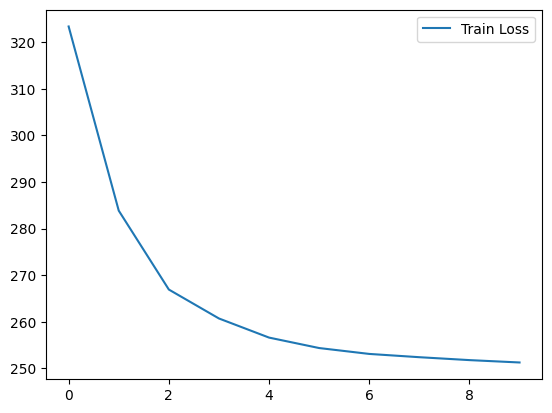

Test Loss: 35005.7376


<Figure size 640x480 with 0 Axes>

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import time



# Step 2: Load the data from Google Drive
drive_path = '/content/drive/MyDrive/DL-ASU_Task_00'
X  = np.load(os.path.join(drive_path, 'X_train_tabular.npy'))
y = np.load(os.path.join(drive_path, 'y_train_tabular.npy'))

# Define model with simplified linear layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(12, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc1 = nn.Linear(64, 128)
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(128, 14)

        self.relu1 = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = torch.mean(x, dim=2)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

print(X_tensor.shape)
print(y_tensor.shape )

# initializing
input_channels = X_tensor.shape[1]
output_size = y_tensor.shape[1]
X_tensor = X_tensor.view(-1, input_channels, 1)

# DataLoader setup
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Initialize and train the model
model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:.4f}')

# Plotting Training Loss
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.show()
plt.savefig('LossCNN.png')




In [51]:
from sklearn.metrics import accuracy_score
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)  # Get the predicted class indices
        all_preds.extend(predicted.cpu().numpy())  # Collect predictions
        all_labels.extend(batch_y.cpu().numpy())  # Collect true labels

# Convert lists to numpy arrays for metrics calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(all_labels, axis=1), all_preds)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.1162


Accuracy twady m3ahd sarf sa7y